In [60]:
import json
import numpy as np
import pandas as pd

In [61]:
fol = "ExpNSGA_MutCross/"

path = fol + "2023_08_17_14:26:20/result_0.json"

# path = fol +"2023_08_17_14:09:39/result_0.json"



with open('../../EvolutionaryFramework/results/NSGA_II/' + path) as user_file:
  parsed_json = json.load(user_file)
  
# print(json.dumps(parsed_json, indent = 4, sort_keys=True))

In [62]:
chordProgression = ""
melodyKeyValue = ""
melodyKeyType = ""
data = []
metaParameters = []
metaDictionary = {}
for elem in parsed_json:
    if elem == "metaParameters":
        metaDictionary = {
            'algorithmName': parsed_json[elem]["algorithmName"],
            'populationSize': parsed_json[elem]["populationSize"],
            'numberOfBars': parsed_json[elem]["numberOfBars"],
            'maxNumberOfNotes': parsed_json[elem]["maxNumberOfNotes"],
            'representationType': parsed_json[elem]["representationType"],
            'chordProgression': parsed_json[elem]["chordProgression"],
            'melodyKeyValue': parsed_json[elem]["melodyKeyValue"],
            'melodyKeyType': parsed_json[elem]["melodyKeyType"],
            'crossoverProbability': parsed_json[elem]["crossoverProbability"],
            'mutationProbability': parsed_json[elem]["mutationProbability"],
            'selectionType': parsed_json[elem]["selectionType"],
            'matingPoolSelectionType': parsed_json[elem]["matingPoolSelectionType"],
            'numberOfGenerations': parsed_json[elem]["numberOfGenerations"],
            'criteria': parsed_json[elem]["criteria"],
        }
        for key, value in parsed_json[elem]["weightsValues"].items():
            metaDictionary["weightsValues_" + key] = value
        for key, value in parsed_json[elem]["crossoverType"].items():
            metaDictionary["crossoverType_" + key] = value
        for key, value in parsed_json[elem]["mutationType"].items():
            metaDictionary["mutationType_" + key] = value

        chordProgression = parsed_json[elem]["chordProgression"]
        melodyKeyValue = parsed_json[elem]["melodyKeyValue"]
        melodyKeyType = parsed_json[elem]["melodyKeyType"]
metaParameters.append(metaDictionary)

metaParameters_df = pd.DataFrame(metaParameters)   


for elem in parsed_json:
        if elem == "experiment":
            for generation in parsed_json[elem]:
                if (generation != "qualityOfPopulation"):
                    for front in parsed_json[elem][generation]:
                        for individual in parsed_json[elem][generation][front]:
                            dictionary = {}
                            dictionary = {
                                'generation': generation,
                                'front': front,
                                'melody': individual['melody'],
                                'penalty': individual['penalty']
                            }
                            
                            for criterion in metaParameters_df['criteria'].values[0]:
                                dictionary[criterion] = individual['fitness'][criterion]
                            data.append(dictionary)
                else:
                    print(parsed_json[elem][generation])
data_df = pd.DataFrame(data)

1.4793288708018284


In [63]:
data_df.head()

,generation,front,melody,penalty,SIMPLE_AND_OBVIOUS,COMPLICATED_AND_ENIGMATIC
0,generation_99,front_2,64/0.3125 64/0.1875 64/0.125 64/0.125 64/0.062...,0.500000,0.874995,0.560190
1,generation_99,front_2,64/0.1875 64/0.125 64/0.1875 64/0.125 64/0.125...,0.500000,0.871917,0.563129
2,generation_99,front_2,64/0.0625 69/0.875 55/0.0625 67/0.125 74/0.062...,0.455556,0.589066,0.784063
3,generation_99,front_2,64/0.0625 69/0.875 55/0.0625 67/0.125 74/0.062...,0.455556,0.589066,0.784063
4,generation_99,front_2,64/0.0625 69/0.875 55/0.0625 67/0.125 74/0.062...,0.455556,0.589066,0.784063


In [64]:
metaParameters_df.head()

,algorithmName,populationSize,numberOfBars,maxNumberOfNotes,representationType,chordProgression,melodyKeyValue,melodyKeyType,crossoverProbability,mutationProbability,...,crossoverType_TWO_POINT_CROSSOVER,crossoverType_ONE_POINT_CROSSOVER,crossoverType_MUSICAL_CONTEXT,mutationType_ADD_ZERO,mutationType_SWAP_NOTES,mutationType_SIMPLE,mutationType_TRANSPOSE_NOTES,mutationType_MUSICAL_CONTEXT,mutationType_ADD_REST,mutationType_SWAP_DURATION
0,NSGA-II,250,4,16,f1,"I, V, vi, IV",C,MAJOR,0.99,0.5,...,1.0,2.0,4.0,1.0,3.0,2.0,3.0,10.0,0.5,6.0


In [65]:
data_df.head()

,generation,front,melody,penalty,SIMPLE_AND_OBVIOUS,COMPLICATED_AND_ENIGMATIC
0,generation_99,front_2,64/0.3125 64/0.1875 64/0.125 64/0.125 64/0.062...,0.500000,0.874995,0.560190
1,generation_99,front_2,64/0.1875 64/0.125 64/0.1875 64/0.125 64/0.125...,0.500000,0.871917,0.563129
2,generation_99,front_2,64/0.0625 69/0.875 55/0.0625 67/0.125 74/0.062...,0.455556,0.589066,0.784063
3,generation_99,front_2,64/0.0625 69/0.875 55/0.0625 67/0.125 74/0.062...,0.455556,0.589066,0.784063
4,generation_99,front_2,64/0.0625 69/0.875 55/0.0625 67/0.125 74/0.062...,0.455556,0.589066,0.784063


In [66]:
data_df.loc[0]

generation                                                       generation_99
front                                                                  front_2
melody                       64/0.3125 64/0.1875 64/0.125 64/0.125 64/0.062...
penalty                                                                    0.5
SIMPLE_AND_OBVIOUS                                                    0.874995
COMPLICATED_AND_ENIGMATIC                                              0.56019
Name: 0, dtype: object

In [67]:
# ( fitness - min ) / ( max - min )

weightsMin = 0.0
weightsMax = 0.5

penaltyMin = 0.0
penaltyMax = 0.5

In [68]:
criteria = metaParameters_df['criteria'].values[0]


In [69]:
for criterion in criteria:
    data_df[criterion] = ( data_df[criterion] - data_df['penalty'] - weightsMin ) / (weightsMax - weightsMin)
data_df['penalty'] = ( data_df['penalty'] - penaltyMin ) / (penaltyMax - penaltyMin)

In [70]:
data_df.loc[0]

generation                                                       generation_99
front                                                                  front_2
melody                       64/0.3125 64/0.1875 64/0.125 64/0.125 64/0.062...
penalty                                                                    1.0
SIMPLE_AND_OBVIOUS                                                     0.74999
COMPLICATED_AND_ENIGMATIC                                             0.120381
Name: 0, dtype: object

In [71]:
generation = data_df[data_df["generation"] == "generation_250"].sort_values(by=['front'])

In [72]:
sorted_generation = generation.sort_values(by=criteria, ascending=True)
min_solution = sorted_generation.iloc[0]
max_solution = sorted_generation.iloc[-1]
# print(min_solution)
# print(max_solution)

threshold = 0.05  # Adjust the threshold as needed
similar_points = generation[abs(generation[criteria[0]] - generation[criteria[1]]) <= threshold]

# Calculate Euclidean distances between similar points and the ideal point
ideal_point = similar_points[criteria].mean()
distances = np.linalg.norm(similar_points[criteria] - ideal_point, axis=1)

# Find the index of the closest point
closest_index = np.argmin(distances)

# Select the closest point
closest_point = similar_points.iloc[closest_index]

rightIdealPoint = (max_solution[metaParameters_df['criteria'].values[0][0]] - closest_point[metaParameters_df['criteria'].values[0][0]] ) / 2 + closest_point[metaParameters_df['criteria'].values[0][0]], (max_solution[metaParameters_df['criteria'].values[0][1]] - closest_point[metaParameters_df['criteria'].values[0][1]])/2 + closest_point[metaParameters_df['criteria'].values[0][1]]
# print(rightIdealPoint)


leftIdealPoint = (min_solution[metaParameters_df['criteria'].values[0][0]] - closest_point[metaParameters_df['criteria'].values[0][0]] ) / 2 + closest_point[metaParameters_df['criteria'].values[0][0]], (min_solution[metaParameters_df['criteria'].values[0][1]] - closest_point[metaParameters_df['criteria'].values[0][1]])/2 + closest_point[metaParameters_df['criteria'].values[0][1]]
# print(leftIdealPoint)

import numpy as np

# Calculate Euclidean distances between each point and leftIdealPoint
left_distances = np.linalg.norm(sorted_generation[criteria].values - leftIdealPoint, axis=1)



# Calculate Euclidean distances between each point and rightIdealPoint
right_distances = np.linalg.norm(sorted_generation[criteria].values - rightIdealPoint, axis=1)

# Find the index of the closest point to leftIdealPoint
closest_left_index = np.argmin(left_distances)
closest_left_point = sorted_generation.iloc[closest_left_index]

# Find the index of the closest point to rightIdealPoint
closest_right_index = np.argmin(right_distances)
closest_right_point = sorted_generation.iloc[closest_right_index]


selected_points = pd.concat([min_solution, closest_left_point, closest_point, closest_right_point, max_solution])


print(selected_points)

selected_points.to_json("JSON/" + fol + melodyKeyValue + "_" + melodyKeyType + "_" +chordProgression +'.json', orient='records')

generation                                                      generation_250
front                                                                  front_1
melody                       67/0.0625 62/0.875 55/0.0625 67/0.125 74/0.062...
penalty                                                               0.917892
SIMPLE_AND_OBVIOUS                                                    0.259673
COMPLICATED_AND_ENIGMATIC                                             0.665724
generation                                                      generation_250
front                                                                  front_1
melody                       64/0.0625 62/0.875 55/0.0625 67/0.125 74/0.062...
penalty                                                               0.962041
SIMPLE_AND_OBVIOUS                                                    0.376437
COMPLICATED_AND_ENIGMATIC                                             0.572046
generation                                          

In [73]:
percent = len(generation['melody'].unique()) / len(generation['melody'])
print(percent)

0.476


In [74]:
list_of_fronts = []

for front in generation["front"].unique():
    front_elements = []
    front_data = generation[generation["front"] == front]

    penaltyBoolean = False
    front_penalty = []
    for penalty in front_data["penalty"]:
        front_penalty.append(penalty)
    for criterion in metaParameters_df['criteria'].values[0]:
        front_temp = []
        for i, individual in enumerate(front_data[criterion]):
            front_temp.append(individual)
        front_elements.append(front_temp)
    front_elements.append(front_penalty)
    # print(front_elements)
    list_of_fronts.append(front_elements)

In [75]:
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

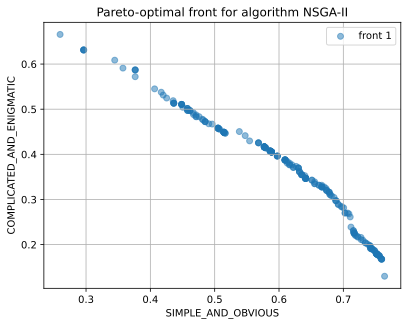

In [76]:
fig, ax = plt.subplots()
ax.set_title("Pareto-optimal front for algorithm NSGA-II")
for i, criterion in enumerate(metaParameters_df['criteria'].values[0]):
    if i == 0:
        ax.set_xlabel(criterion)
    else:
        ax.set_ylabel(criterion)
ax.grid()

for i, (x,y,z) in enumerate(list_of_fronts):
    ax.scatter(x, y, label = f"front {i+1}", alpha=0.5)


plt.legend()
plt.show()



In [77]:
from natsort import index_natsorted
list_of_generations = []
data_df = data_df.sort_values(by=['generation'], key = lambda x: np.argsort(index_natsorted(data_df["generation"])))
for generation_name in data_df["generation"].unique():
    list_of_fronts = []
    generation = data_df[data_df["generation"] == generation_name].sort_values(by=['front'])

    generationElements = []
    for criterion in metaParameters_df['criteria'].values[0]:
        criteriaElements = []   
        for individual in generation[criterion]:
            criteriaElements.append(individual)
        # print(criteriaElements)
        generationElements.append(criteriaElements)

    list_of_generations.append(generationElements)


average_generations = np.zeros((len(list_of_generations), len(metaParameters_df['criteria'].values[0])))

for idx, elem in enumerate(list_of_generations):
    temp = np.zeros(len(metaParameters_df['criteria'].values[0]))
    for i, criterion in enumerate(elem):
        temp[i] = np.average(criterion) 
    average_generations[idx] = temp

# print(average_generations)



/var/folders/xt/9n_zwlsd12d73nqvy46sv7dm0000gn/T/ipykernel_16086/2470951745.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(X, rotation=90)


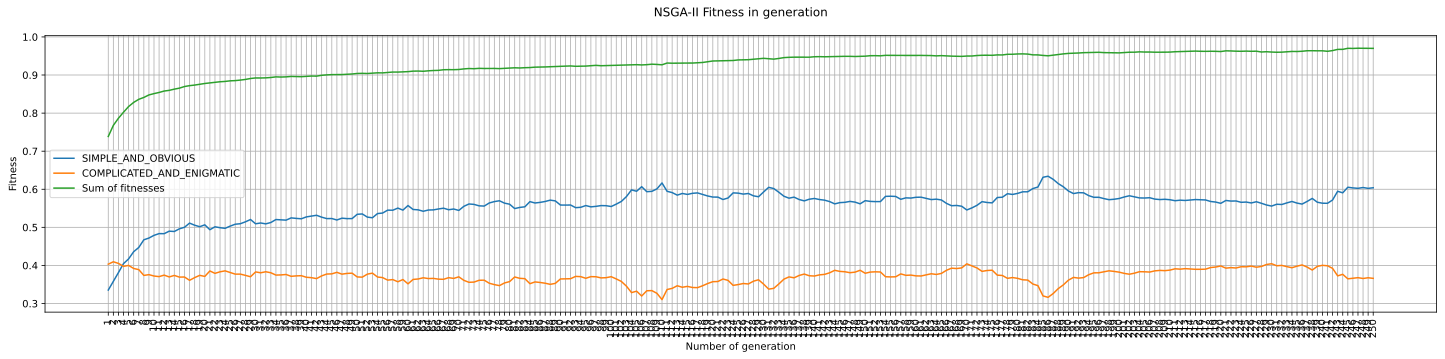

In [78]:
# print(average_generations[:,i])

X = data_df["generation"].unique()
for i, elem in enumerate(X):
    X[i] = elem[11:]

fig, ax = plt.subplots(figsize=(25,5))
# ax.set_title("NSGA-II Fitness in generation\n" + path)
ax.set_title("NSGA-II Fitness in generation\n")
for i, criterion in enumerate(metaParameters_df['criteria'].values[0]):  
    ax.plot(X, average_generations[:,i], label=criterion)
        
ax.plot(X, average_generations[:,0] + average_generations[:,1], label="Sum of fitnesses")

ax.set_xticklabels(X, rotation=90)

ax.set_xlabel("Number of generation")
ax.set_ylabel("Fitness")

ax.grid()

plt.legend()
plt.show()